# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [123]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [144]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df["title_length"] = df["title"].str.len()
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [145]:
# Calcula media, mediana y moda de la columna 'title_length'
mean_length = df["title_length"].mean()
mean_length

np.float64(15.481103166496425)

In [126]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["title_length"].max() - df["title_length"].min()
rango

np.int64(67)

In [127]:
# Calcula asimetría y curtosis de la columna 'title_length'
from scipy.stats import skew
asimetria = skew(df["title_length"])
asimetria

np.float64(1.5229143965677572)

In [128]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df.loc[df["title_length"].idxmin(), ["title", "title_length"]]
titulo_mas_largo = df.loc[df["title_length"].idxmax(), ["title", "title_length"]]
print("Título más corto:")
print(titulo_mas_corto)
print("\nTítulo más largo:")
print(titulo_mas_largo)

Título más corto:
title           M
title_length    1
Name: 63, dtype: object

Título más largo:
title           Dr. Strangelove or: How I Learned to Stop Worr...
title_length                                                   68
Name: 48, dtype: object


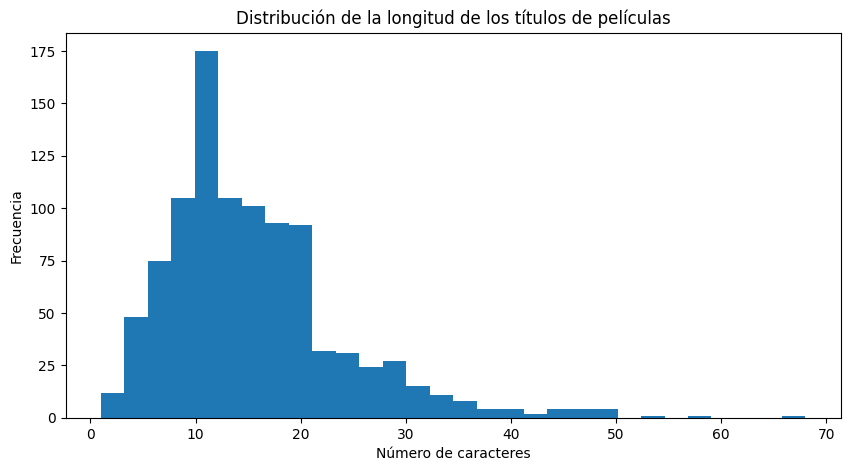

In [129]:
# grafica tus resultados
plt.figure(figsize=(10, 5))
plt.hist(df["title_length"], bins=30)
plt.title("Distribución de la longitud de los títulos de películas")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [130]:
sample_titles = df[["title", "title_length"]].head(5)
sample_titles

,title,title_length
0,The Shawshank Redemption,24
1,The Godfather,13
2,The Godfather: Part II,22
3,The Dark Knight,15
4,Pulp Fiction,12


In [131]:
#Valores numericos:
values = sample_titles["title_length"].values
values

array([24, 13, 22, 15, 12])

In [132]:
#Calcular la media
mean_manual = np.mean(values)
mean_manual

np.float64(17.2)

In [133]:
#Desviaciones
deviations = values - mean_manual
deviations

array([ 6.8, -4.2,  4.8, -2.2, -5.2])

In [134]:
#cuadrado las desviaciones
squared_deviations = deviations ** 2
squared_deviations

array([46.24, 17.64, 23.04,  4.84, 27.04])

In [135]:
#Sumar las desviaciones cuadradas
sum_squared_dev = squared_deviations.sum()
sum_squared_dev

np.float64(118.80000000000001)

In [136]:
#Dividir entre (n - 1)
n = len(values)
variance_manual = sum_squared_dev / (n - 1)
variance_manual

np.float64(29.700000000000003)

In [137]:
#Raíz cuadrada → desviación estándar
std_manual = np.sqrt(variance_manual)
std_manual

np.float64(5.449770637375485)

In [138]:
#Comprobamos
np.std(values, ddof=1)

np.float64(5.449770637375485)

In [139]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
# Lista de 5 longitudes de títulos reales
sample_lengths = [10, 13, 14, 18, 22]
sample_lengths
#Cada número representa la cantidad de caracteres de un título de película

[10, 13, 14, 18, 22]

In [140]:
# Calcula la media de los 5 valores
sample_lengths = [10, 13, 14, 18, 22]

mean_sample = sum(sample_lengths) / len(sample_lengths)
mean_sample

15.4

In [141]:
# Calcula las diferencias al cuadrado con respecto a la media
sample_lengths = [10, 13, 14, 18, 22]
mean_sample = 15.4

squared_diff = [(x - mean_sample)**2 for x in sample_lengths]
squared_diff

[29.160000000000004,
 5.760000000000002,
 1.960000000000001,
 6.759999999999998,
 43.559999999999995]

Cada valor nos dice cuánto se aleja un título de la media, al cuadrado.

Estos valores se usan para calcular la varianza y desviación estándar.

In [142]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación.
squared_diff = [29.16, 5.76, 1.96, 6.76, 43.56]
n = 5
variance_manual = sum(squared_diff) / (n - 1)
std_manual = variance_manual ** 0.5
variance_manual, std_manual

(21.8, 4.669047011971501)

La varianza indica la dispersión de los títulos respecto a la media al cuadrado, mientras que la desviación estándar nos da la dispersión en la misma unidad que los datos (número de caracteres).
En promedio, cada título se aleja de la media unos 4.67 caracteres.